<a href="https://colab.research.google.com/github/kkkkk317/AI_CLASS/blob/master/Change_codes_when_load_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **pickle in Python3**

In [0]:
import pickle

In [0]:
import _pickle as pickle

# **Hide warning when load MNIST**

In [0]:
%tensorflow_version 1.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(201911)

In [0]:
print(tf.__version__)

In [0]:
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = input_data.read_data_sets("tmp / data/", one_hot=True )

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting tmp / data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting tmp / data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting tmp / data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting tmp / data/t10k-labels-idx1-ubyte.gz


# **Using Keras module**

In [0]:
%tensorflow_version 1.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(201911)

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_x = train_x.reshape([train_x.shape[0], -1]) / 255
test_x = test_x.reshape([test_x.shape[0], -1]) / 255

train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [0]:
buffer_size = train_x.shape[0] + test_x.shape[0]

dataset = tf.data.Dataset.from_tensor_slices(({"image": train_x}, train_y))
dataset = dataset.shuffle(buffer_size).repeat().batch(100)
iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)
next_batch = iterator.get_next()

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [0]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [0]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = sess.run(next_batch)
    sess.run(train_step, feed_dict={x: batch_xs['image'], t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:test_x, t: test_y})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 7590.535156, Accuracy: 0.845800
Step: 200, Loss: 5409.604492, Accuracy: 0.873800
Step: 300, Loss: 4544.633789, Accuracy: 0.891900
Step: 400, Loss: 4104.909668, Accuracy: 0.898300
Step: 500, Loss: 3800.045898, Accuracy: 0.902700
Step: 600, Loss: 3590.590820, Accuracy: 0.904300
Step: 700, Loss: 3445.729980, Accuracy: 0.909600
Step: 800, Loss: 3391.903076, Accuracy: 0.909300
Step: 900, Loss: 3253.136719, Accuracy: 0.911900
Step: 1000, Loss: 3181.138672, Accuracy: 0.913600
Step: 1100, Loss: 3118.448486, Accuracy: 0.914200
Step: 1200, Loss: 3067.145264, Accuracy: 0.916000
Step: 1300, Loss: 3022.478516, Accuracy: 0.916300
Step: 1400, Loss: 2990.152832, Accuracy: 0.916500
Step: 1500, Loss: 2972.139160, Accuracy: 0.916500
Step: 1600, Loss: 2921.661133, Accuracy: 0.918200
Step: 1700, Loss: 2904.751709, Accuracy: 0.919300
Step: 1800, Loss: 2881.363037, Accuracy: 0.921000
Step: 1900, Loss: 2869.446777, Accuracy: 0.920800
Step: 2000, Loss: 2850.558838, Accuracy: 0.921600


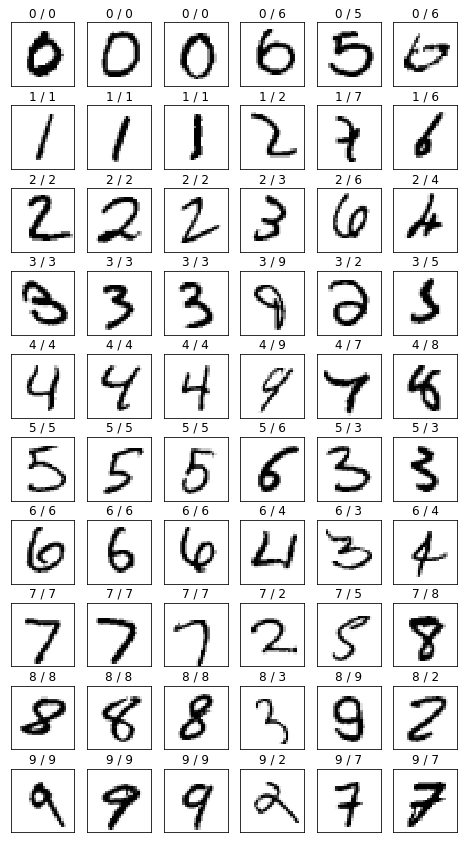

In [0]:
images, labels = test_x, test_y
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break

# **Change the dir of MNIST data**

In [0]:
%tensorflow_version 1.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

np.random.seed(201911)

In [0]:
(train_x, train_y), (test_x, test_y) = tfds.load('mnist', split=['train', 'test'], batch_size=-1, as_supervised=True)